In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from scipy.stats import norm
import math
%matplotlib inline
pd.options.display.max_rows = 100
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import statistics as st
import random
import sklearn


# Import data

In [2]:
df = pd.read_csv("Data/Data_Marketing_Customer_Analysis_Round3.csv")

In [3]:
df = df.drop('effective_to_date', axis = 1)

In [4]:
numericals = df.select_dtypes(np.number)
categoricals = df.select_dtypes(np.object)

/var/folders/wq/2vxkh_6d4g7dpxkr5q82nxzh0000gn/T/ipykernel_24634/3149187810.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = df.select_dtypes(np.object)


# Preprocessing

### Check correlation

In [ ]:
df.corr()
# no high correlation

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.coverage = le.fit_transform(df.coverage)
df.education = le.fit_transform(df.education)
df.vehicle_class = le.fit_transform(df.vehicle_class)
df.vehicle_size = le.fit_transform(df.vehicle_size)

### Hot Encoding

In [ ]:
df = pd.get_dummies(df, prefix = ['region','response', 'employment_status', 'gender', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel'], columns = ['region','response', 'employment_status', 'gender', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel'], drop_first=False)

In [ ]:
# change categories quickly
# for col in ['region', 'response', 'coverage',
#       'education', 'month', 'employment_status',
#       'gender', 'location_code', 'marital_status',
#       'policy_type', 'policy', 'renew_offer_type',
#       'sales_channel', 'vehicle_class', 'vehicle_size']: df[col] = df[col].astype('category')

In [ ]:
# df['region'] = df['region'].cat.rename_categories({'central': 0, 'west region': 1, 'east': 2, 'north west': 3})

In [ ]:
# categoricals = df.select_dtypes(include=['category'])
# categoricals

In [ ]:
# for col in df.columns:
#    if df[col].dtype == 'category':
#        df[col] = le.fit_transform(df[col])

In [ ]:
df.shape
# now I have 48 rows, dunno if that's great...

In [ ]:
# numericals.hist(figsize = (11,12))

In [5]:
# x y split
X = numericals.drop('total_claim_amount', axis=1)
y = numericals.total_claim_amount

In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [37]:
# scale train and test (fit & transform train; only transform test)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# train model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
#lr.coef_
#lr.intercept_

LinearRegression()

array([ -6.1418607 , -31.72677744, 186.29158041,   1.66182273,
        -1.47924562,  -2.21387573,   3.24168968])

434.8695535952954

In [39]:
# predict
y_lr_train_pred =  pd.DataFrame(lr.predict(X_train_scaled), columns = ['total_claim_amount'])
y_lr_test_pred = pd.DataFrame(lr.predict(X_test_scaled), columns = ['total_claim_amount'])

In [45]:
# model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_train_ar2 = 1 - (1 - lr_train_r2) * (len(y_train) -1) / (len(y_train) - X_train.shape[1] - 1)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
lr_test_ar2 = 1 - (1 - lr_test_r2) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1)


lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_mae, lr_test_mae, lr_train_r2, lr_test_r2, lr_train_ar2, lr_test_ar2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Test MSE', 'Training MAE', 'Test MAE', 'Training R2', 'Test R2', 'Training Ad. R2', 'Test Ad. R2']

lr_results
# error_train < error_test => model ok!

,Method,Training MSE,Test MSE,Training MAE,Test MAE,Training R2,Test R2,Training Ad. R2,Test Ad. R2
0,Linear Regression,50466.291642,50661.021567,152.704759,152.906952,0.408667,0.411757,0.408113,0.41047


<Figure size 500x500 with 0 Axes>

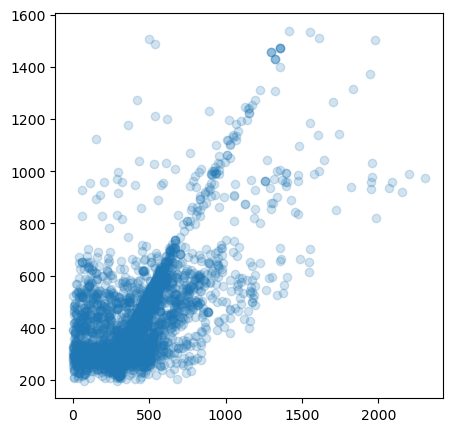

In [32]:
# scatterplot y_test, y_pred
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_lr_test_pred, alpha = 0.2)

<AxesSubplot:>

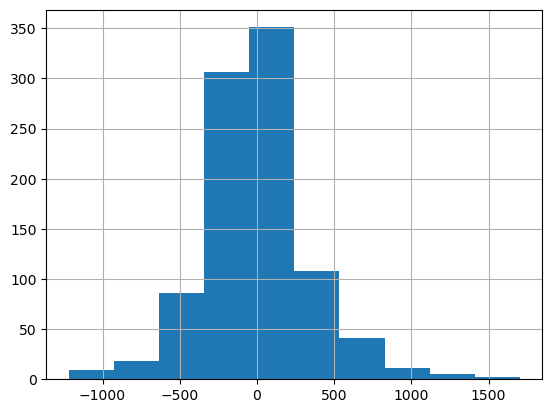

In [58]:
residuals = y_test - y_lr_test_pred.total_claim_amount
residuals.hist()

In [72]:
y_test = y_test.to_numpy().reshape(-1,1)

In [73]:
y_lr_test_pred - y_test

,total_claim_amount
0,-31.747266
1,157.401221
2,544.735342
3,276.561815
4,-261.999035
...,...
3202,-234.624717
3203,168.204110
3204,-296.374977
3205,142.239480


In [67]:
residuals_error.shape

(3207, 3207)

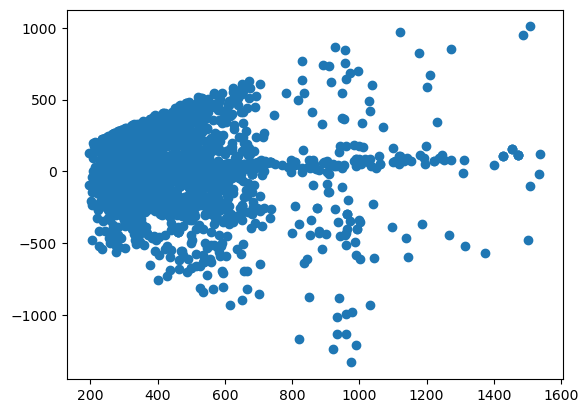

In [74]:
residuals_error = y_lr_test_pred.to_numpy() - y_test
plt.scatter(y_lr_test_pred, residuals_error)

#plt.scatter(y_lr_test_pred, residuals)
#y_pred.to_numpy() - y_test.to_numpy()
#y_pred.to_numpy() - y_test.to_numpy()

In [76]:
X_train

array([[-0.30279362,  1.38283862, -0.55997483, ..., -0.55202731,
        -0.4231219 ,  0.00755297],
       [-0.8099625 , -1.19862973, -0.82461546, ...,  1.60171543,
        -0.4231219 , -0.82349639],
       [-0.39119788,  1.79562991, -0.58937935, ..., -0.15717448,
        -0.4231219 ,  0.00755297],
       ...,
       [-0.15299751, -1.45813196, -0.94223352, ..., -1.23404584,
        -0.4231219 , -0.40797171],
       [ 0.10311483,  1.4965549 ,  0.52799221, ...,  0.0581998 ,
        -0.4231219 ,  0.00755297],
       [-0.55009442,  1.05354953, -0.85401998, ...,  0.9555926 ,
         0.67004042,  1.66965171]])

In [75]:
features_importances = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

AttributeError: 'numpy.ndarray' object has no attribute 'columns'